<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as Gridspec
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import numpy as np
import os
import re
import math
import warnings
from tqdm.notebook import tqdm
from pathlib import Path
warnings.filterwarnings("ignore")

plt.rcParams.update({
    # Основные параметры шрифтов
    'font.size': 20,            # Размер основного текста
    'axes.titlesize': 18,       # Размер заголовка
    'axes.labelsize': 16,       # Размер подписей осей
    'xtick.labelsize': 12,      # Размер подписей по оси X
    'ytick.labelsize': 12,      # Размер подписей по оси Y
    'legend.fontsize': 14,      # Размер текста легенды
    'figure.titlesize': 16,     # Размер заголовка фигуры
    
    # Параметры сетки
    'axes.grid': True,          # Включить сетку
    'grid.linestyle': '--',     # Стиль линии (пунктирная)
    'grid.alpha': 0.8,          # Прозрачность сетки (80%)
    'grid.color': 'gray',       # Цвет сетки
    'grid.linewidth': 0.8,      # Толщина линий сетки
    'axes.axisbelow': True      # Сетка под графиками
})

In [2]:
save_dir = r'C:\Users\gizza\OneDrive\Desktop\Учеба\Диплом мага\Рисунки\Режим постоянного давления'
os.makedirs(save_dir, exist_ok=True)  # exist_ok=True предотвращает ошибку, если папка уже есть

markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'X', 'P', 'h', '8', 'd']


path = Path(r'C:\Users\gizza\OneDrive\Desktop\Учеба\ИТЖМ\0-0,4 ПСФ\0%\10')


df = pd.read_csv(path / 'PSF_0%_10_1_1.vol', sep='\s+', header=None)
df1 = pd.read_csv(path / 'PSF_0%_10_2_1.vol', sep='\s+', header=None)
df2 = pd.read_csv(path / 'PSF_0%_10_3_1.vol', sep='\s+', header=None)
df.columns = ['V', 'P', 't']
df1.columns = ['V', 'P', 't']
df2.columns = ['V', 'P', 't']

In [3]:
df = df.loc[df['t'] != 0]
df = df.reset_index(drop=True)
df['V'] = df['V'] - df.iloc[0]['V']
df['P'] = df['P'] * 101325 / 10**6

In [4]:
df1 = df1.loc[df1['t'] != 0]
df1 = df1.reset_index(drop=True)
df1['V'] = df1['V'] - df1.iloc[0]['V']
df1['P'] = df1['P'] * 101325 / 10**6

In [5]:
df2 = df2.loc[df2['t'] != 0]
df2 = df2.reset_index(drop=True)
df2['V'] = df2['V'] - df2.iloc[0]['V']
df2['P'] = df2['P'] * 101325 / 10**6

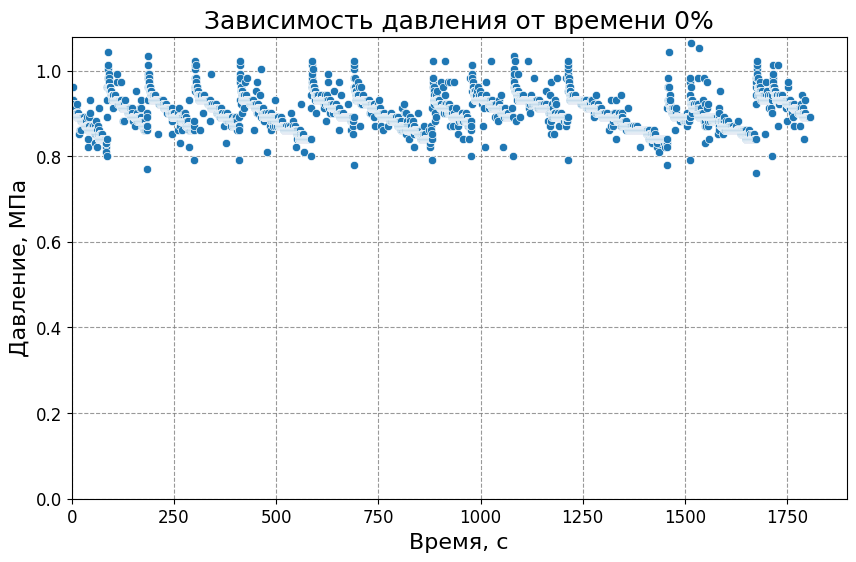

In [6]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='t', y='P')

plt.xlim(0, None)
plt.ylim(0, None)

plt.xlabel('Время, с')
plt.ylabel('Давление, МПа')

plt.title('Зависимость давления от времени 0%')

save_path = os.path.join(save_dir, 'pressure_vs_time.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')  # dpi - качество, bbox_inches - обрезка пустых полей

plt.show()  # Показать график (если нужно)

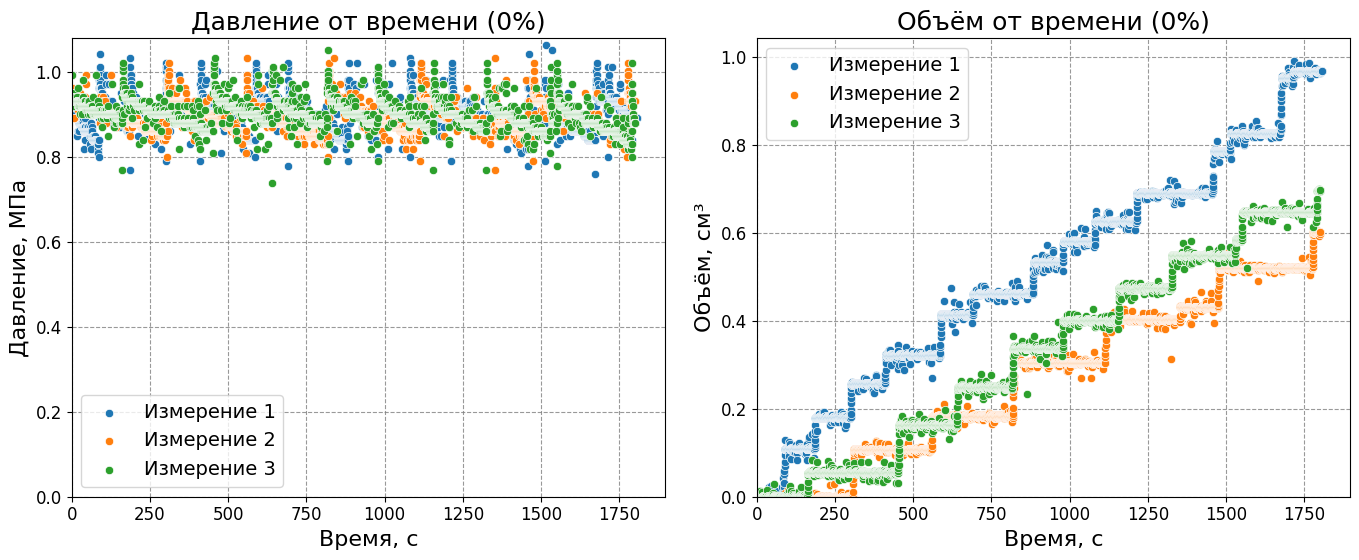

In [7]:
plt.figure(figsize=(14, 6))  # Широкая фигура для двух графиков

# --- Левый график: Давление от времени ---
plt.subplot(1, 2, 1)  # 1 строка, 2 столбца, 1-я позиция
sns.scatterplot(data=df, x='t', y='P', label='Измерение 1')
sns.scatterplot(data=df1, x='t', y='P', label='Измерение 2')
sns.scatterplot(data=df2, x='t', y='P', label='Измерение 3')
plt.xlabel('Время, с')
plt.ylabel('Давление, МПа')
plt.title('Давление от времени (0%)')
plt.xlim(0, None)
plt.ylim(0, None)
plt.legend()

# --- Правый график: Объём от времени ---
plt.subplot(1, 2, 2)  # 1 строка, 2 столбца, 2-я позиция
sns.scatterplot(data=df, x='t', y='V', label='Измерение 1')
sns.scatterplot(data=df1, x='t', y='V', label='Измерение 2')
sns.scatterplot(data=df2, x='t', y='V', label='Измерение 3')
plt.xlabel('Время, с')
plt.ylabel('Объём, см³')
plt.title('Объём от времени (0%)')
plt.xlim(0, None)
plt.ylim(0, None)
plt.legend()

plt.tight_layout()  # Убирает наложения
save_path = os.path.join(save_dir, 'pressure_and_volume_comparison.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

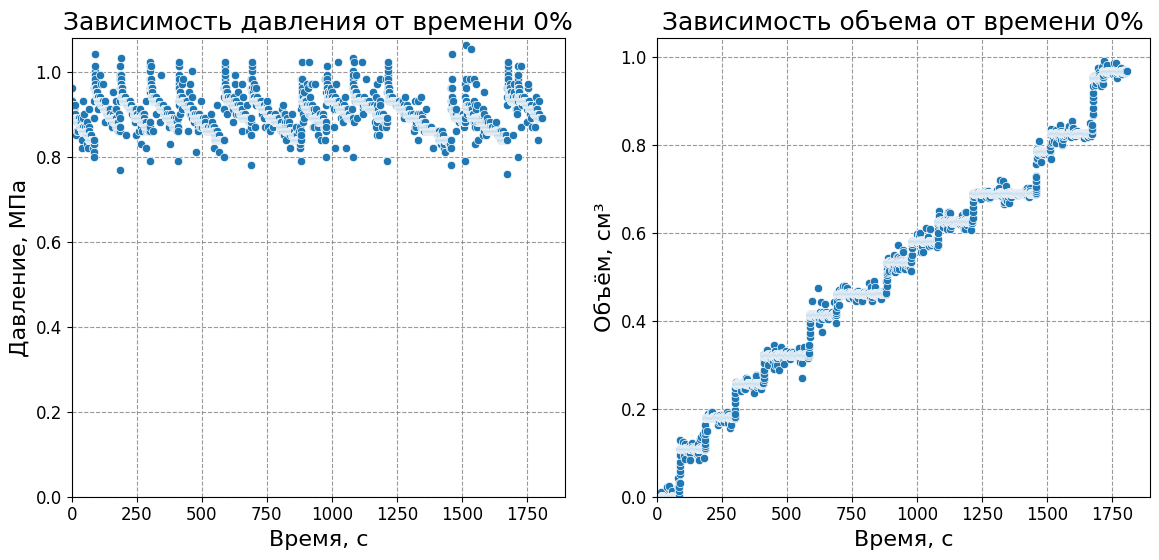

In [8]:
plt.figure(figsize=(12, 6))  # Увеличиваем ширину фигуры для двух графиков

# Первый график (давление)
plt.subplot(1, 2, 1)  # 1 строка, 2 столбца, позиция 1
sns.scatterplot(data=df, x='t', y='P')
plt.xlim(0, None)
plt.ylim(0, None)
plt.xlabel('Время, с')
plt.ylabel('Давление, МПа')
plt.title('Зависимость давления от времени 0%')

# Второй график (объем)
plt.subplot(1, 2, 2)  # 1 строка, 2 столбца, позиция 2
sns.scatterplot(data=df, x='t', y='V')
plt.xlim(0, None)
plt.ylim(0, None)
plt.xlabel('Время, с')
plt.ylabel('Объём, см³')
plt.title('Зависимость объема от времени 0%')

plt.tight_layout()  # Автоматическая регулировка отступов между графиками

# Сохранение
save_path = os.path.join(save_dir, 'pressure_and_volume_vs_time.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

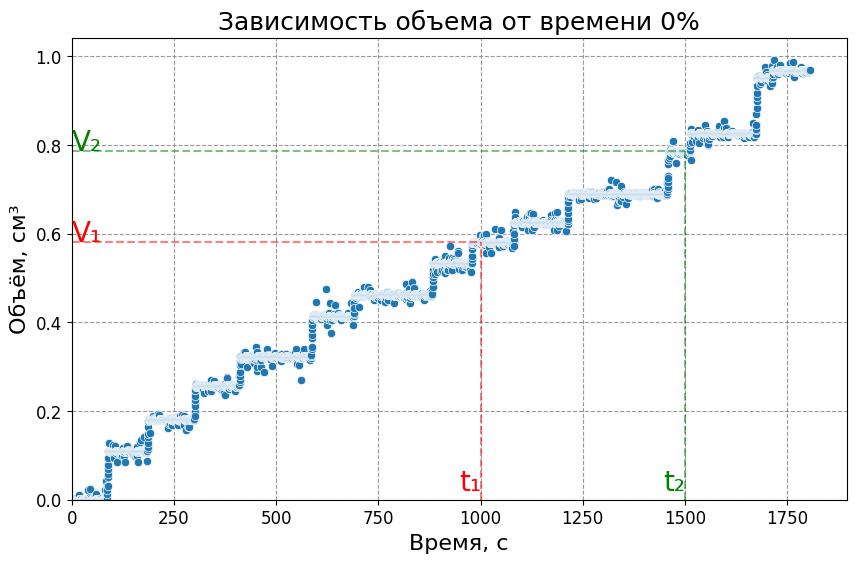

In [9]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='t', y='V')

plt.xlim(0, None)
plt.ylim(0, None)

plt.xlabel('Время, с')
plt.ylabel('Объём, см³')
plt.title('Зависимость объема от времени 0%')

v1 = df.iloc[(df['t'] - 1000).abs().argmin()]['V']
v2 = df.iloc[(df['t'] - 1500).abs().argmin()]['V']

# Добавляем вертикальные линии и подписи для времени
#plt.axvline(x=1000, color='r', linestyle='--', alpha=0.5)
plt.plot([1000, 1000], [0, v1], color='r', linestyle='--', alpha=0.5)
plt.text(1000 - 25, 0 + 0.021, 't₁', ha='center', color='r')

#plt.axvline(x=1500, color='g', linestyle='--', alpha=0.5)
plt.plot([1500, 1500], [0, v2], color='g', linestyle='--', alpha=0.5)

plt.text(1500 - 25, 0.021, 't₂', ha='center', color='g')

# Находим значения объема в моменты времени 1000 и 1500 секунд
# (используем ближайшие доступные значения)


# Добавляем горизонтальные линии и подписи для объема
#plt.axhline(y=v1, color='r', linestyle='--', alpha=0.5)
plt.plot([0, 1000], [v1, v1], color='r', linestyle='--', alpha=0.5)
plt.text(0, v1 + 0.021, 'V₁', va='center', color='r')

#plt.axhline(y=v2, color='g', linestyle='--', alpha=0.5)
plt.plot([0, 1500], [v2, v2], color='g', linestyle='--', alpha=0.5)

plt.text(0, v2 + 0.021, 'V₂', va='center', color='g')

# Сохраняем график
save_path = os.path.join(save_dir, 'calc_volume_vs_time.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

In [10]:
def transform_df(df):
    # Создаем копию DataFrame чтобы не изменять оригинал
    transformed = df.copy()
    
    # Получаем список всех столбцов, кроме '% ОГ' и 'Толщина'
    cols_to_transform = [col for col in df.columns if col not in ['%, ОГ', 'Толщина']]
    
    # Преобразуем выбранные столбцы
    for col in cols_to_transform:
        transformed[col] = (df[col] * 10000000 * 10**(-16) / 101325) / (df['Толщина'] * 10**(-6))
    
    # Также преобразуем толщину (если нужно)
    transformed['Толщина'] = df['Толщина'] * 10**(-6)
    
    return transformed

data = {
    '%, ОГ': [0, 0.1, 0.2, 0.3, 0.4],
    '10': [6.91, 64.06, 28.01, 19.93, 6.49],
    '15': [35.22, 260.10, 80.81, 21.02, 7.15],
    '20': [96.20, 311.43, 102.99, 188.44, 110.10],
    '10_Погрешность': [1.05, 5.53, 3.08, 9.94, 2.06],
    '15_Погрешность': [2.06, 88.65, 3.22, 1.60, 0.87],
    '20_Погрешность': [11.37, 40.03, 4.30, 36.62, 26.28],
    'Толщина': [105.00, 70.00, 70.00, 70.00, 70.00]
}

# Создаем DataFrame
K_df_1 = pd.DataFrame(data)

data = {
    '%, ОГ': [0, 0.1, 0.2, 0.3, 0.4],
    '10': [10.29, 40.13, 14.48, 11.27, 8.65],
    '15': [11.27, 226.82, 32.26, 20.32, 11.58],
    '20': [26.60, 560.88, 159.93, 86.47, 21.28],
    '10_Погрешность': [2.18, 7.31, 2.60, 3.35, 1.99],
    '15_Погрешность': [0.79, 20.12, 9.34, 1.04, 1.90],
    '20_Погрешность': [4.45, 23.08, 55.30, 4.00, 1.83],
    'Толщина': [90.00, 75.00, 65.00, 60.00, 65.00]
}

K_df_2 = pd.DataFrame(data)

data = {
    '%, ОГ': [0, 0.1, 0.2, 0.3, 0.4],
    '10': [10.21, 32.95, 91.06, 10.75, 15.60],
    '15': [39.89, 100.18, 178.41, 9.44, 14.01],
    '20': [68.60, 511.57, np.nan, 30.06, 17.53],  # пропущенное значение как NaN
    '10_Погрешность': [0.80, 8.37, 15.30, 5.89, 8.26],
    '15_Погрешность': [2.07, 11.61, 0.68, 0.69, 1.27],
    '20_Погрешность': [9.51, 210.71, np.nan, 5.21, 1.30],  # пропущенное значение как NaN
    'Толщина': [105.00, 65.00, 70.00, 70.00, 75.00]
}

K_df_3 = pd.DataFrame(data)

In [11]:
K_df_1_transformed = transform_df(K_df_1)
K_df_2_transformed = transform_df(K_df_2)
K_df_3_transformed = transform_df(K_df_3)

K_df = [K_df_1_transformed, K_df_2_transformed, K_df_3_transformed]

In [12]:
def plot_permeability(df_list, value_col, error_col, title_suffix=''):
    """
    Строит график зависимости проницаемости от концентрации ОГ с соединением точек пунктиром
    
    Параметры:
    df_list - список DataFrame с данными
    value_col - название столбца со значениями (например, '10', '15', '20')
    error_col - название столбца с погрешностями (например, '10_Погрешность')
    title_suffix - дополнительная строка в заголовке графика
    """
    plt.figure(figsize=(10, 6))
    
    # Стили для разных серий
    markers = ['o', 's', 'D', '^', 'v']  # Маркеры для точек
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Цвета для серий
    line_styles = ['--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 5))]  # Разные стили пунктира
    
    for i, df in enumerate(df_list):
        # Проверяем наличие необходимых столбцов
        if value_col not in df.columns or error_col not in df.columns:
            print(f"Предупреждение: в DataFrame {i+1} отсутствуют требуемые столбцы")
            continue
            
        # Сортируем данные по концентрации ОГ
        df_sorted = df.sort_values('%, ОГ')
        
        # Построение линии с пунктиром
        plt.plot(
            df_sorted['%, ОГ'],
            df_sorted[value_col] * 10**9,
            linestyle='--',
            color=colors[i % len(colors)],
            linewidth=1.5,
            alpha=0.7
        )
        
        # Построение точек
        plt.scatter(
            df_sorted['%, ОГ'],
            df_sorted[value_col] * 10**9,
            marker=markers[i % len(markers)],
            color=colors[i % len(colors)],
            s=100,
            edgecolor='black',
            linewidth=0.8,
            label=f'{i + 1} серия'
        )
        
        # Построение погрешностей
        plt.errorbar(
            df_sorted['%, ОГ'],
            df_sorted[value_col] * 10**9,
            yerr=df_sorted[error_col] * 10**9,
            fmt='none',
            ecolor='black',
            elinewidth=1,
            capsize=4,
            alpha=0.6
        )
    
    plt.xlabel('Концентрация, %')
    plt.ylabel('Проницаемость, кг/(м²⋅с⋅Па)×10⁻⁹')
    plt.title(f'Зависимость проницаемости от концентрации ОГ, {title_suffix}')
    plt.legend()
    plt.tight_layout()
    save_path = os.path.join(save_dir, f'permeability_vs_concentration_{value_col}.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

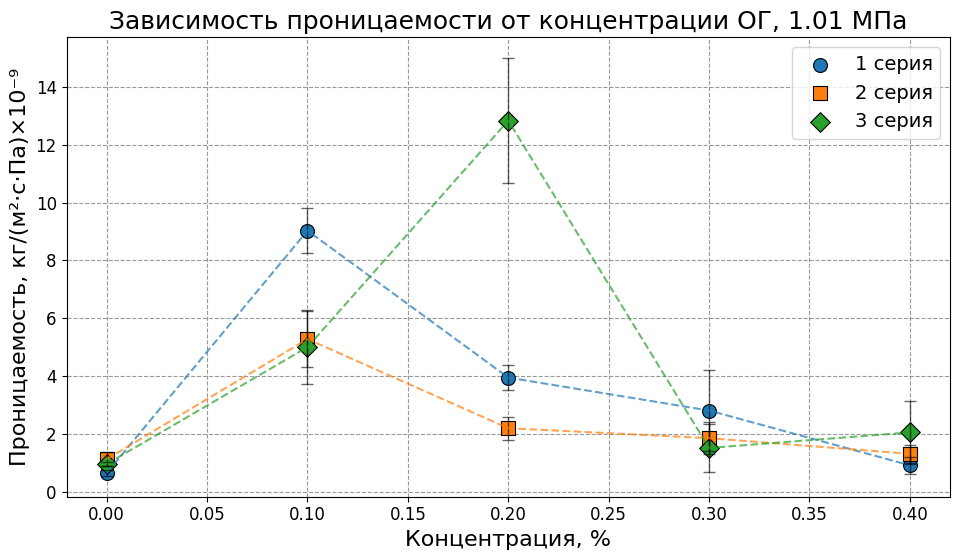

In [13]:
plot_permeability(K_df, '10', '10_Погрешность', '1.01 МПа')

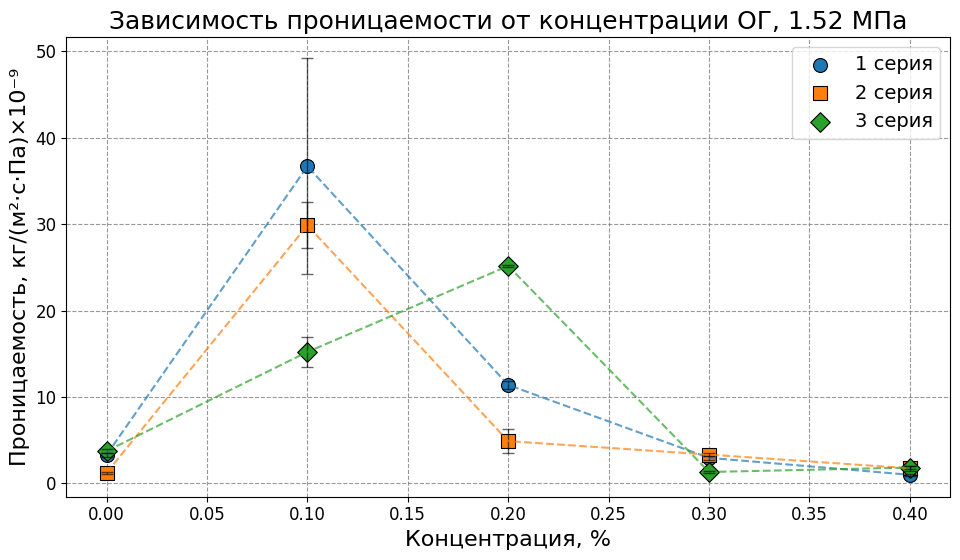

In [14]:
plot_permeability(K_df, '15', '15_Погрешность', '1.52 МПа')

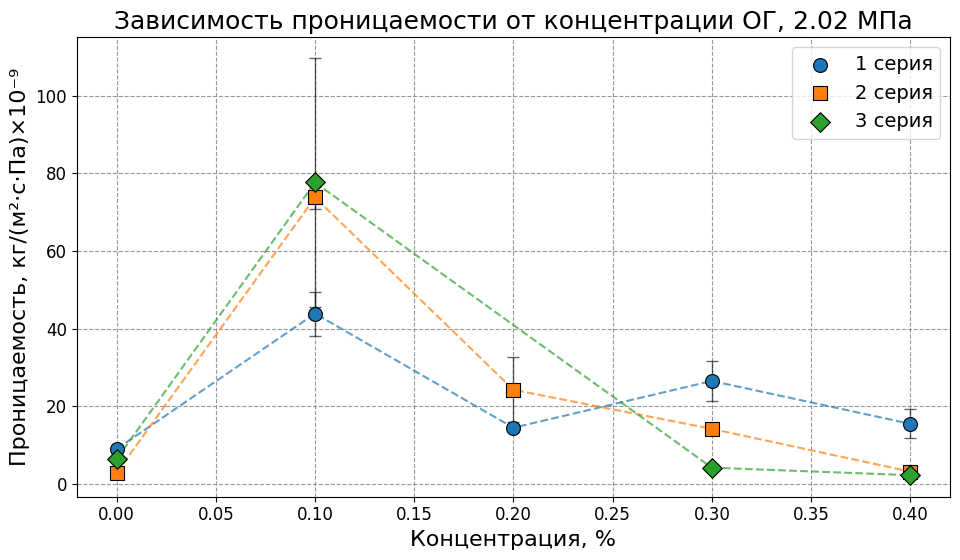

In [15]:
plt.figure(figsize=(10, 6))

# Проверяем, что в списке K_df есть хотя бы 3 DataFrame
if len(K_df) >= 3:
    # Сортируем данные для каждой серии
    df1 = K_df[0].sort_values('%, ОГ')
    df2 = K_df[1].sort_values('%, ОГ')
    df3 = K_df[2].sort_values('%, ОГ')
    
    # Стили из функции
    markers = ['o', 's', 'D', '^', 'v']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    
    # Серия 1 - оформление как в функции
    plt.plot(df1['%, ОГ'], df1['20']*10**9, linestyle='--', 
             color=colors[0], linewidth=1.5, alpha=0.7, zorder=1)
    plt.scatter(df1['%, ОГ'], df1['20']*10**9, marker=markers[0], 
               color=colors[0], s=100, edgecolor='black', linewidth=0.8, 
               label='1 серия', zorder=2)
    plt.errorbar(df1['%, ОГ'], df1['20']*10**9, yerr=df1['20_Погрешность']*10**9, 
                fmt='none', ecolor='black', elinewidth=1, capsize=4, alpha=0.6, zorder=1)
    
    # Серия 2 - оформление как в функции
    plt.plot(df2['%, ОГ'], df2['20']*10**9, linestyle='--', 
             color=colors[1], linewidth=1.5, alpha=0.7, zorder=1)
    plt.scatter(df2['%, ОГ'], df2['20']*10**9, marker=markers[1], 
               color=colors[1], s=100, edgecolor='black', linewidth=0.8, 
               label='2 серия', zorder=2)
    plt.errorbar(df2['%, ОГ'], df2['20']*10**9, yerr=df2['20_Погрешность']*10**9, 
                fmt='none', ecolor='black', elinewidth=1, capsize=4, alpha=0.6, zorder=1)
    
    # Серия 3 - сохраняем ваше оригинальное построение, но с оформлением из функции
    plt.plot([0, 0.1], [df3[df3['%, ОГ'] == 0]['20']*10**9, df3[df3['%, ОГ'] == 0.1]['20']*10**9], 
             linestyle='--', color=colors[2], linewidth=1.5, alpha=0.7, zorder=1)
    plt.plot([0.1, 0.3], [df3[df3['%, ОГ'] == 0.1]['20']*10**9, df3[df3['%, ОГ'] == 0.3]['20']*10**9], 
             linestyle='--', color=colors[2], linewidth=1.5, alpha=0.7, zorder=1)
    plt.plot([0.3, 0.4], [df3[df3['%, ОГ'] == 0.3]['20']*10**9, df3[df3['%, ОГ'] == 0.4]['20']*10**9], 
             linestyle='--', color=colors[2], linewidth=1.5, alpha=0.7, zorder=1)
    
    plt.scatter(df3['%, ОГ'], df3['20']*10**9, marker=markers[2], 
               color=colors[2], s=100, edgecolor='black', linewidth=0.8, 
               label='3 серия', zorder=2)
    plt.errorbar(df3['%, ОГ'], df3['20']*10**9, yerr=df3['20_Погрешность']*10**9, 
                fmt='none', ecolor='black', elinewidth=1, capsize=4, alpha=0.6, zorder=1)

# Оформление как в функции
plt.xlabel('Концентрация, %')
plt.ylabel('Проницаемость, кг/(м²⋅с⋅Па)×10⁻⁹')
plt.title('Зависимость проницаемости от концентрации ОГ, 2.02 МПа')
plt.legend()
plt.tight_layout()

save_path = os.path.join(save_dir, 'permeability_vs_concentration_20.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

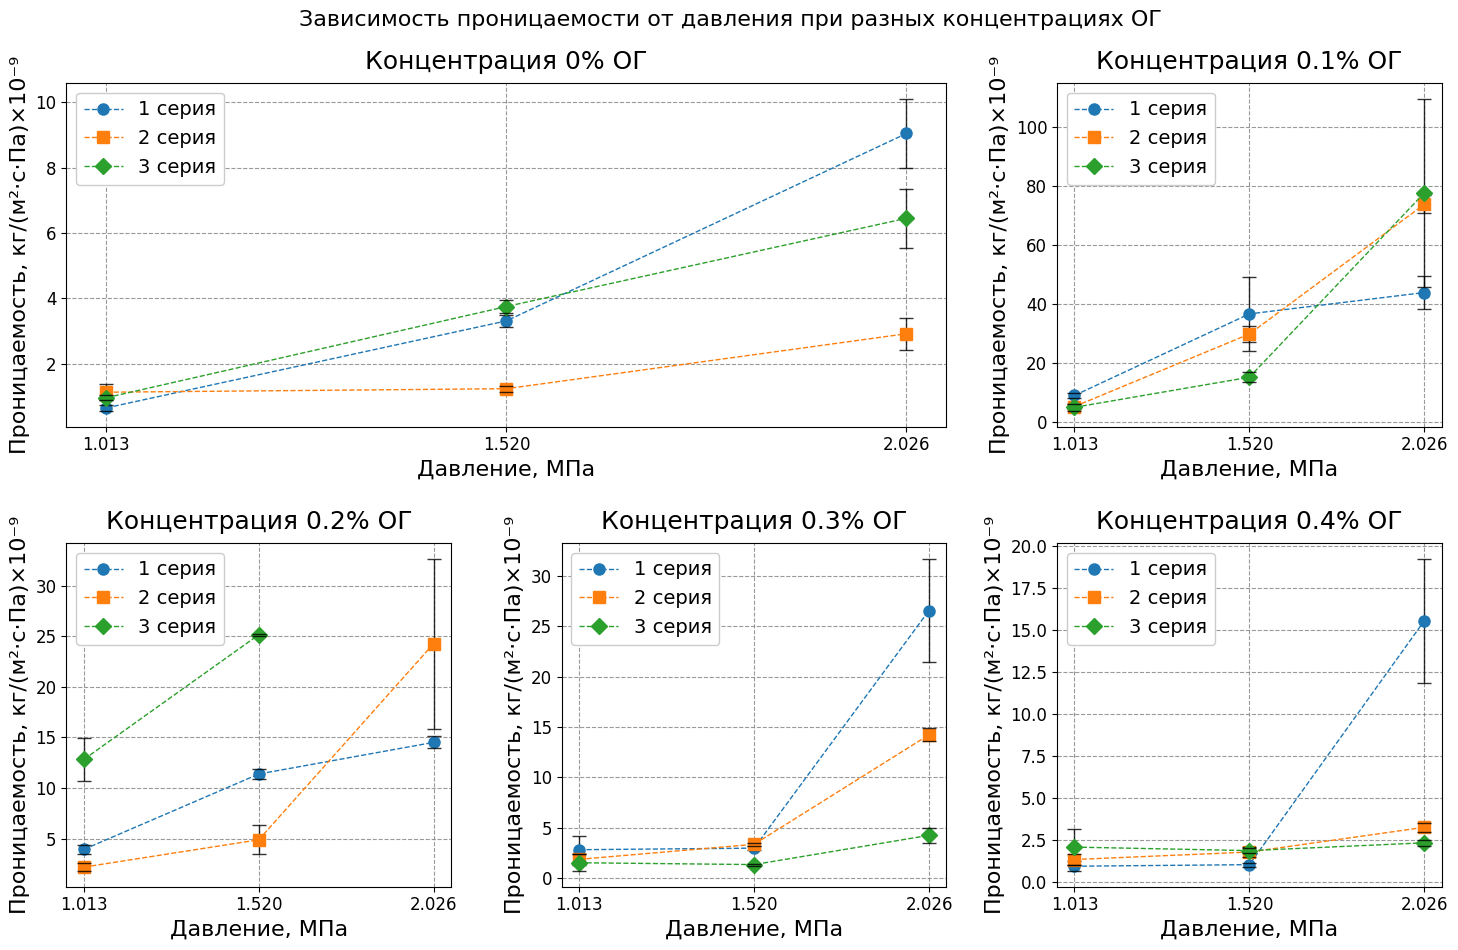

In [16]:
def plot_permeability_vs_pressure_grid(df_list, concentrations, error_suffix='_Погрешность'):
    """
    Строит сетку графиков зависимости проницаемости от давления (в МПа) 
    с разным расположением для первой концентрации
    
    Параметры:
    df_list - список DataFrame с данными
    concentrations - список концентраций ОГ
    error_suffix - суффикс столбцов с погрешностями
    """
    # Создаем фигуру с нестандартной сеткой
    fig = plt.figure(figsize=(15, 10))
    
    # Специальная сетка: первый график шире (2 колонки), остальные - по одной
    gs = fig.add_gridspec(2, 3)
    ax1 = fig.add_subplot(gs[0, :2])  # Первый график занимает первые 2 колонки
    ax2 = fig.add_subplot(gs[0, 2])   # Второй график - третью колонку
    ax3 = fig.add_subplot(gs[1, 0])   # Третий график - первая колонка второй строки
    ax4 = fig.add_subplot(gs[1, 1])   # Четвертый график - вторая колонка второй строки
    ax5 = fig.add_subplot(gs[1, 2])   # Пятый график - третья колонка второй строки
    
    axes = [ax1, ax2, ax3, ax4, ax5]
    pressures_atm = [10, 15, 20]  # Давление в атмосферах
    pressures_mpa = [p * 0.101325 for p in pressures_atm]  # Конвертируем в МПа
    
    # Стили для разных серий
    markers = ['o', 's', 'D']  # Маркеры для разных серий
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Цвета для серий
    
    for conc_idx, (conc, ax) in enumerate(zip(concentrations, axes)):
        for series_idx, df in enumerate(df_list):
            # Получаем значения для текущей концентрации
            conc_mask = df['%, ОГ'] == conc
            if not any(conc_mask):
                continue
                
            # Собираем данные
            values = []
            errors = []
            for p in pressures_atm:
                value_col = str(p)
                error_col = f"{p}{error_suffix}"
                
                if value_col in df.columns and error_col in df.columns:
                    val = df.loc[conc_mask, value_col].values[0] * 10**9
                    err = df.loc[conc_mask, error_col].values[0] * 10**9
                    values.append(val)
                    errors.append(err)
                else:
                    values.append(np.nan)
                    errors.append(np.nan)
            
            # Построение графика с давлением в МПа
            # Основные линии и точки
            ax.plot(
                pressures_mpa,
                values,
                linestyle='--',
                color=colors[series_idx],
                linewidth=1,
                marker=markers[series_idx],
                markersize=8,
                label=f'{series_idx+1} серия'
            )
            
            # Погрешности с черными крестами
            ax.errorbar(
                pressures_mpa,
                values,
                yerr=errors,
                fmt='none',  # Не показывать дополнительные маркеры
                ecolor='black',  # Черный цвет для погрешностей
                elinewidth=1,
                capsize=5,
                capthick=1,
                alpha=0.8
            )
        
        # Настройки подграфика
        ax.set_title(f'Концентрация {conc}% ОГ', pad=10)
        ax.set_xlabel('Давление, МПа')
        ax.set_ylabel('Проницаемость, кг/(м²⋅с⋅Па)×10⁻⁹')
        ax.set_xticks(pressures_mpa)
        ax.set_xticklabels([f"{p:.3f}" for p in pressures_mpa])
        
        ax.legend(loc='upper left', framealpha=1)
    
    # Общий заголовок
    fig.suptitle('Зависимость проницаемости от давления при разных концентрациях ОГ', 
                y=0.96)
    plt.tight_layout()
    save_path = os.path.join(save_dir, 'permeability_vs_pressure.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

# Концентрации для отображения
concentrations = [0, 0.1, 0.2, 0.3, 0.4]

plot_permeability_vs_pressure_grid(
    df_list=[K_df_1_transformed, K_df_2_transformed, K_df_3_transformed],
    concentrations=concentrations
)

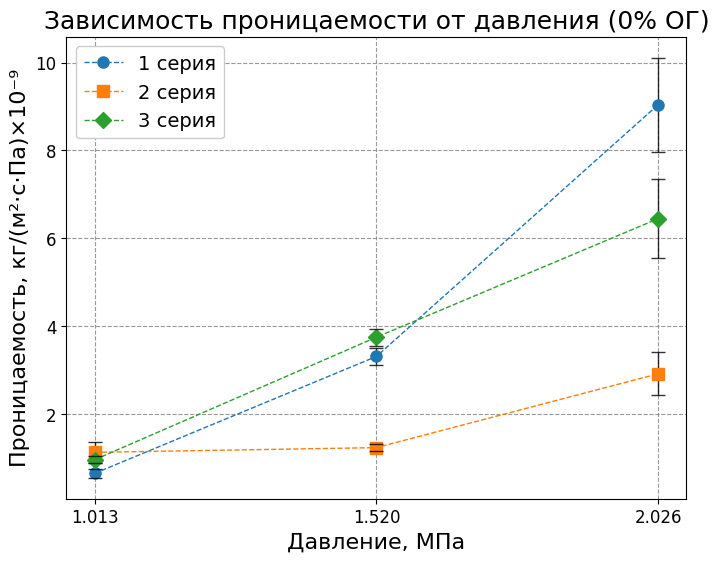

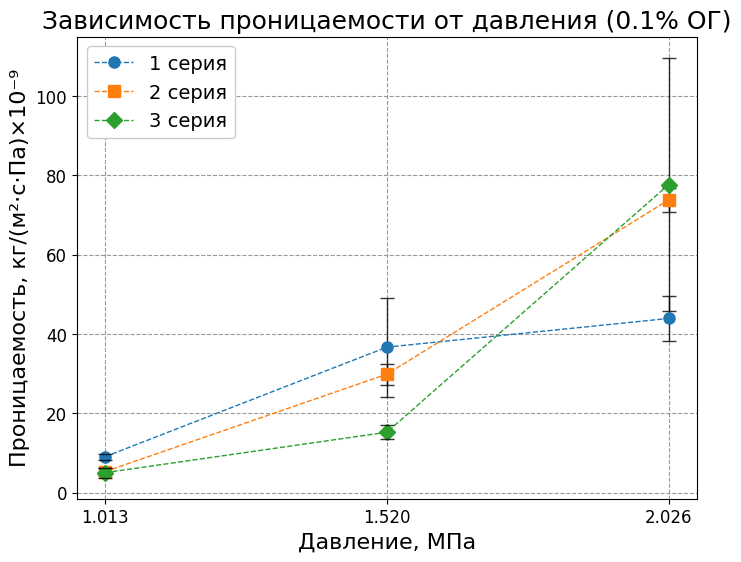

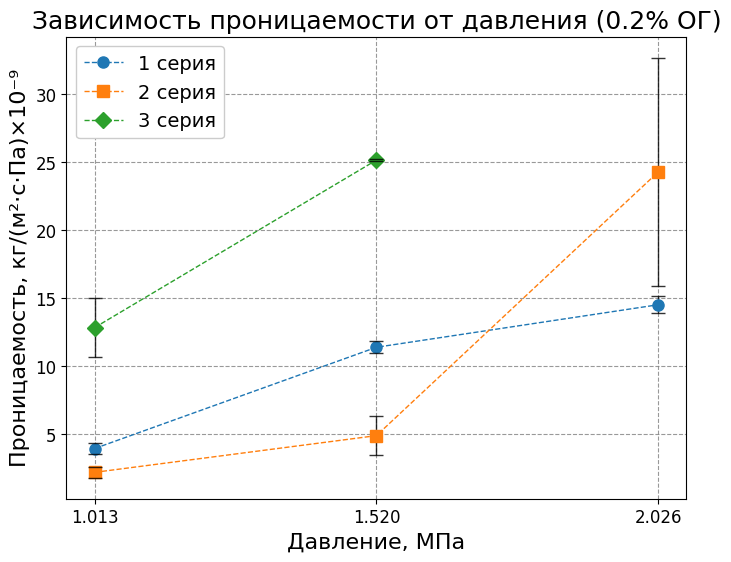

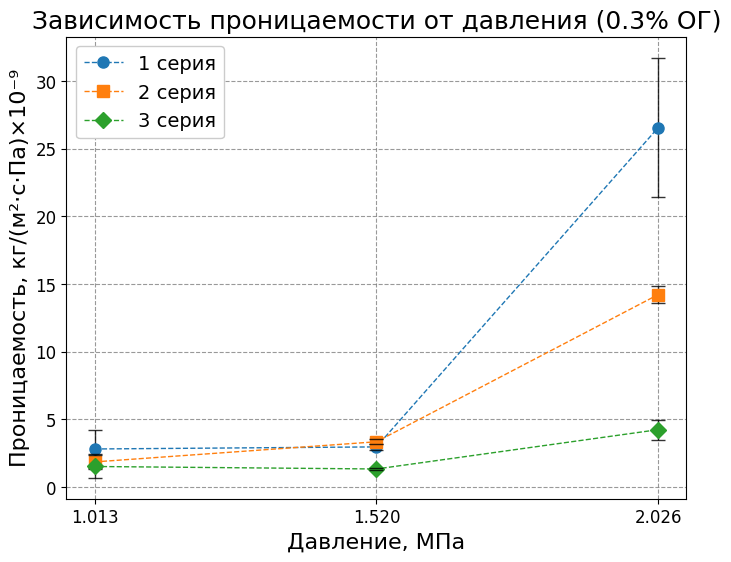

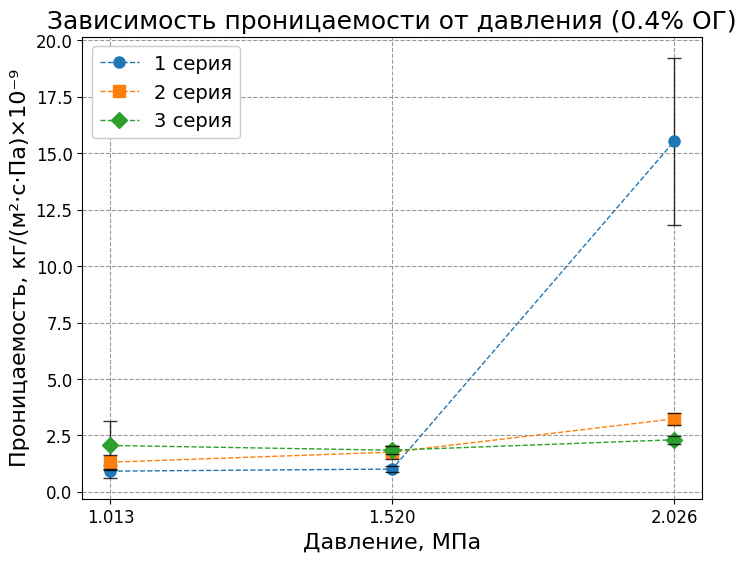

In [17]:
def plot_permeability_vs_pressure_individual(df_list, concentrations, error_suffix='_Погрешность'):
    """
    Строит отдельные графики зависимости проницаемости от давления (в МПа) 
    для каждой концентрации
    
    Параметры:
    df_list - список DataFrame с данными
    concentrations - список концентраций ОГ
    error_suffix - суффикс столбцов с погрешностями
    """
    pressures_atm = [10, 15, 20]  # Давление в атмосферах
    pressures_mpa = [p * 0.101325 for p in pressures_atm]  # Конвертируем в МПа
    
    # Стили для разных серий
    markers = ['o', 's', 'D']  # Маркеры для разных серий
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Цвета для серий
    
    for conc in concentrations:
        # Создаем новую фигуру для каждой концентрации
        plt.figure(figsize=(8, 6))
        
        for series_idx, df in enumerate(df_list):
            # Получаем значения для текущей концентрации
            conc_mask = df['%, ОГ'] == conc
            if not any(conc_mask):
                continue
                
            # Собираем данные
            values = []
            errors = []
            for p in pressures_atm:
                value_col = str(p)
                error_col = f"{p}{error_suffix}"
                
                if value_col in df.columns and error_col in df.columns:
                    val = df.loc[conc_mask, value_col].values[0] * 10**9
                    err = df.loc[conc_mask, error_col].values[0] * 10**9
                    values.append(val)
                    errors.append(err)
                else:
                    values.append(np.nan)
                    errors.append(np.nan)
            
            # Построение графика с давлением в МПа
            # Основные линии и точки
            plt.plot(
                pressures_mpa,
                values,
                linestyle='--',
                color=colors[series_idx],
                linewidth=1,
                marker=markers[series_idx],
                markersize=8,
                label=f'{series_idx+1} серия'
            )
            
            # Погрешности с черными крестами
            plt.errorbar(
                pressures_mpa,
                values,
                yerr=errors,
                fmt='none',
                ecolor='black',
                elinewidth=1,
                capsize=5,
                capthick=1,
                alpha=0.8
            )
        
        # Настройки графика
        plt.title(f'Зависимость проницаемости от давления ({conc}% ОГ)')
        plt.xlabel('Давление, МПа')
        plt.ylabel('Проницаемость, кг/(м²⋅с⋅Па)×10⁻⁹')
        plt.xticks(pressures_mpa, [f"{p:.3f}" for p in pressures_mpa])
        plt.legend(loc='upper left', framealpha=1)
        
        # Сохранение
        save_path = os.path.join(save_dir, f'permeability_vs_pressure_{conc}percent.png')
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()

# Пример использования
plot_permeability_vs_pressure_individual(
    df_list=[K_df_1_transformed, K_df_2_transformed, K_df_3_transformed],
    concentrations=[0, 0.1, 0.2, 0.3, 0.4]
)

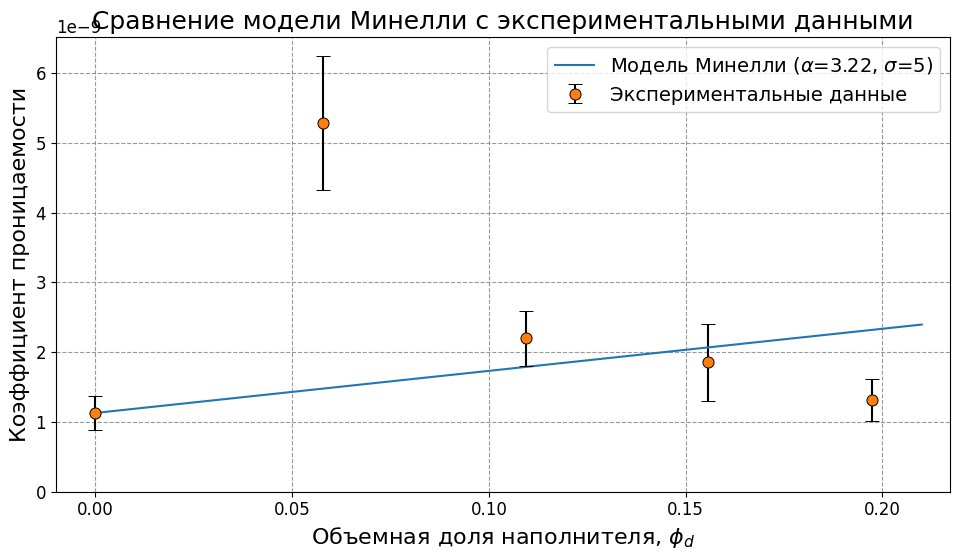

In [18]:
def minelli_tortuosity(phi, sigma, alpha):
    """
    Вычисляет коэффициент тортуозности по модели Минелли
    
    Параметры:
    sigma : float
        Геометрический параметр (отношение расстояния между частицами к их размеру)
    alpha : float
        Коэффициент формы частиц (aspect ratio)
    phi_d : float
        Объемная доля наполнителя (0 < phi_d < 1)
    
    Возвращает:
    float
        Коэффициент тортуозности tau
    """
    # Вычисляем параметр r (критерий перехода между режимами)
    r = 2 * (alpha - phi * (alpha + 2))/(phi * alpha**2)
    
    if r <= 1:
        # Первый режим (низкие концентрации)
        term1 = (phi / (2 * alpha)) * (alpha + 2)**2
        denominator = alpha**2 - alpha * phi * (alpha + 2)
        term2 = (phi**2 * (alpha + 2)**4) / (4 * denominator)
        log_arg = (2 / math.pi) * (alpha / (phi * (alpha + 2)) - 1)
        term3 = (2 / math.pi) * (alpha + 2)**2 * math.log(log_arg)
        
        tau = (term1 + term2 + term3)**(-1)
    else:
        # Второй режим (высокие концентрации)
        term1 = 1
        term2 = (phi / 2) * (alpha + 2)
        log_arg = (1 / math.pi) * (alpha + 2)
        term3 = (2 * phi / (math.pi * alpha)) * (alpha + 2)**2 * math.log(log_arg)
        
        tau = 1 / (term1 + term2 + term3)
    
    return tau

# Ваши экспериментальные данные
concentrations = np.array([0, 0.1, 0.2, 0.3, 0.4])
m_psf = 3.3335  # g
m_go = m_psf * concentrations
ro_psf = 1.23  # g/cm^3
ro_go = 2  # g/cm^3
V_go = m_go / ro_go
V_psf = m_psf / ro_psf
phi_d_experiment = V_go / (V_go + V_psf)

# Создаем равномерно распределенные значения для модели
phi_d_model = np.linspace(0, 0.21, 100)  # 100 точек от 0 до максимального экспериментального значения

# Вычисление коэффициента тортуозности для модели
alpha = 3.22
sigma = 5
tau_model = np.array([minelli_tortuosity(phi, alpha=alpha, sigma=sigma) for phi in phi_d_model[1:]])  # исключаем phi=0
tau_model = np.insert(tau_model, 0, 1)  # при phi=0, tau=1

# Расчет модельных значений K
K0 = K_df[1]['10'][0]  # базовое значение проницаемости при phi=0
model_K = K0 / tau_model

# Создание графика
plt.figure(figsize=(10, 6))

# 1. Сначала рисуем плавную модельную кривую
plt.plot(
    phi_d_model,
    model_K,
    label=f'Модель Минелли ($\\alpha$={alpha}, $\\sigma$={sigma})'  # Добавлены параметры в легенду
)

# 2. Затем наносим экспериментальные данные с погрешностями
plt.errorbar(
    x=phi_d_experiment,
    y=K_df[1]['10'],
    yerr=K_df[1]['10_Погрешность'],
    fmt='o',
    markersize=8,
    markeredgecolor='black',
    markeredgewidth=0.7,
    ecolor='black',
    elinewidth=1.5,
    capsize=5,
    capthick=1.5,
    label='Экспериментальные данные'
)

# Настройки графика
plt.xlabel('Объемная доля наполнителя, $\phi_d$')
plt.ylabel('Коэффициент проницаемости')
plt.title('Сравнение модели Минелли с экспериментальными данными')
plt.legend()

# Установка пределов осей
plt.xlim(-0.01, max(phi_d_experiment)*1.1)
plt.ylim(0, None)

plt.tight_layout()
plt.show()